In [ ]:
#Import Essential Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.8.2


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving data_memoire.xlsx to data_memoire.xlsx


In [ ]:
data = pd.read_excel(io.BytesIO(uploaded['data_memoire.xlsx'])) 
print(data)

      Derivation cohort  LOS_Y  LOS  Death   Age  Severity  MI  PVD  CHF  CVD  \
0                     1      1    1      0   >80         3   0    0    0    0   
1                     1      1    2      1   >60         7   0    1    0    0   
2                     1      1    2      1   >80         7   0    1    1    1   
3                     1      1   15      0   >70         9   1    0    0    0   
4                     1      1    9      0   >70         7   0    0    0    0   
...                 ...    ...  ...    ...   ...       ...  ..  ...  ...  ...   
4706                  0      1    4      0   >70         4   0    0    0    0   
4707                  0      1    2      0   >60         2   0    1    0    0   
4708                  0      0    0      0   >60         1   0    1    0    0   
4709                  0      0    0      0   >80         3   0    1    0    0   
4710                  0      0    0      0  0-60         2   0    1    0    0   

      ...  Ferritin > 300  

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
data.groupby(['Death'],).size()


Death
0    3563
1    1148
dtype: int64

In [ ]:
#visulalisation et analyse 
  #Afficher le nom de chaque colonne
data.columns.sort_values()

Index(['ALT', 'ALT > 40', 'ALTYes', 'AST', 'AST > 40', 'ASTYes', 'Age',
       'Age.1', 'AgeScore', 'All CNS', 'BUN', 'BUN > 30', 'BUNYes',
       'C-Reactive Prot > 10', 'CHF', 'COPD', 'CVD', 'CrctProtYes',
       'CrctProtein', 'Creatinine', 'CrtnScore', 'CrtnYes', 'D-Dimer > 3',
       'DDimerYes', 'DEMENT', 'DM Complicated', 'DM Simple', 'Ddimer', 'Death',
       'Derivation cohort', 'Ferritin', 'Ferritin > 300', 'FerritinYes',
       'Glucose', 'Glucose <60 or > 500', 'GlucoseYese', 'IL6', 'IL6 > 150',
       'IL6Yes', 'INR', 'INR > 1.2', 'INRYes', 'LOS', 'LOS_Y', 'Lympho',
       'LymphoYes', 'Lymphocytes < 1', 'MAP', 'MAP < 70', 'MI', 'MapYes',
       'O2 Sat < 94', 'O2SatsYes', 'OldOtherNeuro', 'OldSyncope', 'OsSats',
       'OtherBrnLsn', 'PVD', 'Plts', 'PltsScore', 'PltsYes', 'ProCalCYes',
       'Procalciton > 0.1', 'Procalcitonin', 'Pure CNS', 'Renal Disease',
       'Seizure', 'Severity', 'SodimuYes', 'Sodium', 'Sodium < 139 or > 154',
       'Stroke', 'Temp', 'Temp > 38',

In [ ]:
#Analyse Data - Overview Shape
data.shape

(4711, 81)

In [ ]:
#Afficher le type de chaque colonne et null (si présent)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Derivation cohort      4711 non-null   int64  
 1   LOS_Y                  4711 non-null   int64  
 2   LOS                    4711 non-null   int64  
 3   Death                  4711 non-null   int64  
 4   Age                    4711 non-null   object 
 5   Severity               4711 non-null   int64  
 6   MI                     4711 non-null   int64  
 7   PVD                    4711 non-null   int64  
 8   CHF                    4711 non-null   int64  
 9   CVD                    4711 non-null   int64  
 10  DEMENT                 4711 non-null   int64  
 11  COPD                   4711 non-null   int64  
 12  DM Complicated         4711 non-null   int64  
 13  DM Simple              4711 non-null   int64  
 14  Renal Disease          4711 non-null   int64  
 15  All 

In [ ]:
data.isnull().any()

Derivation cohort    False
LOS_Y                False
LOS                  False
Death                False
Age                  False
                     ...  
Procalcitonin        False
Procalciton > 0.1    False
TropYes              False
Troponin             False
Troponin > 0.1       False
Length: 81, dtype: bool

In [ ]:
data.describe()

,Derivation cohort,LOS_Y,LOS,Death,Severity,MI,PVD,CHF,CVD,DEMENT,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,...,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.499682,0.927616,7.160263,0.243685,3.586287,0.042666,0.187434,0.114838,0.107408,0.078964,...,0.543621,0.836128,10.314919,0.393335,0.655487,1.585601,0.365952,0.863935,0.051558,0.095521
std,0.500053,0.259150,7.029782,0.429350,2.289303,0.202125,0.408897,0.318860,0.309664,0.269711,...,0.498146,0.370198,11.223356,0.488542,0.475260,6.262625,0.481747,0.342893,0.268160,0.293965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
50%,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.500000,0.000000,1.000000,0.100000,0.000000,1.000000,0.010000,0.000000
75%,1.000000,1.000000,9.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,0.400000,1.000000,1.000000,0.020000,0.000000
max,1.000000,1.000000,56.000000,1.000000,11.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000100,1.000000,1.000000,50.000100,1.000000,1.000000,9.560000,1.000000


In [ ]:
df = pd.DataFrame(data) 
print(df)

      Derivation cohort  LOS_Y  LOS  Death   Age  Severity  MI  PVD  CHF  CVD  \
0                     1      1    1      0   >80         3   0    0    0    0   
1                     1      1    2      1   >60         7   0    1    0    0   
2                     1      1    2      1   >80         7   0    1    1    1   
3                     1      1   15      0   >70         9   1    0    0    0   
4                     1      1    9      0   >70         7   0    0    0    0   
...                 ...    ...  ...    ...   ...       ...  ..  ...  ...  ...   
4706                  0      1    4      0   >70         4   0    0    0    0   
4707                  0      1    2      0   >60         2   0    1    0    0   
4708                  0      0    0      0   >60         1   0    1    0    0   
4709                  0      0    0      0   >80         3   0    1    0    0   
4710                  0      0    0      0  0-60         2   0    1    0    0   

      ...  Ferritin > 300  

In [ ]:


#y = data['Death']#Devison de données dépondantes et indépondantes

from sklearn.model_selection import train_test_split
 
x = data.drop(['Death', 'Severity','Age'], axis=1)
y = data['Death']

print('x', x.shape)

print('y', y)





x (4711, 78)
y 0       0
1       1
2       1
3       0
4       0
       ..
4706    0
4707    0
4708    0
4709    0
4710    0
Name: Death, Length: 4711, dtype: int64


In [ ]:

#standarisation des données
scaler = StandardScaler();
x_scaled = scaler.fit_transform(x)
print(x_scaled)



[[ 1.00063701  0.27934215 -0.87640231 ...  0.39685496 -0.15499055
  -0.3249754 ]
 [ 1.00063701  0.27934215 -0.73413528 ...  0.39685496  4.28313254
   3.07715597]
 [ 1.00063701  0.27934215 -0.73413528 ... -2.51981229 -0.1922857
  -0.3249754 ]
 ...
 [-0.9993634  -3.57983928 -1.01866933 ... -2.51981229 -0.1922857
  -0.3249754 ]
 [-0.9993634  -3.57983928 -1.01866933 ...  0.39685496 -0.15499055
  -0.3249754 ]
 [-0.9993634  -3.57983928 -1.01866933 ... -2.51981229 -0.1922857
  -0.3249754 ]]


x (4711, 80)


In [ ]:
print('y', y.shape)

y (4711,)


In [ ]:
#Définir les données de test et d'entrainement , test pour verifier la presision de notre reseau /entraiement : nos data d'entrées
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state= 42)

In [ ]:
    # initialiser le modele 

    modele = tf.keras.models.Sequential()
    # ajouter la premiere couche 
    modele.add(tf.keras.layers.Dense(100, activation = 'relu',input_shape = [x_train.shape[1]]))
    # couches chachées,
    modele.add(tf.keras.layers.Dense(100, activation = 'relu'))
    modele.add(tf.keras.layers.Dense(100, activation = 'relu'))
    # la fonction de sortie
    modele.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    # Compiler le reseau
    modele.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) # Accuracy performance metrice
    #appliquer le modele sur nos données
    training = modele.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80)
    #evaluer le model
    score= modele.evaluate(x_train,y_train) 
    #evaluer la précision
    print("Précision de l'entraînement : %.2f%%\n " % (score[1]*100)) 
    scoreT= modele.evaluate(x_test,y_test) 
    print ("Précision des tests : %.2f%%\n " % (scoreT[1]*100))

    #2 couche  : 1 RELU et 1 sigmoid
    #nombre de noeuds des chouche caché et entrée :50  et  1  pendant 50 epoque =>  Précision de l'entraînement: 97.08% ,Précision des tests :82.61%
    #nombre de noeuds des chouche caché et entrée :100 et  1  pendant 50 epoque =>  Précision de l'entraînement : 99.34%   ,Précision des tests : 81.65%

    #nombre de noeuds des chouche caché et entrée :50  et  1  pendant 80 epoque =>  Précision de l'entraînement 99.12%   ,Précision des tests : 81.23%
    #nombre de noeuds des chouche caché et entrée :100 et  1  pendant 80 epoque =>  Précision de l'entraînement 99.87%  : ,Précision des tests : 81.34%

   #nombre de noeuds des chouche caché et entrée :50 et  1  pendant 120 epoque =>  Précision de l'entraînement 99.95%  ,Précision des tests :80.70%
   #nombre de noeuds des chouche caché et entrée :100 et  1  pendant 120 epoque =>  Précision de l'entraînement 99.95   ,Précision des tests : 81.55%

    #3 couche  : 2 RELU et 1 sigmoid
    #nombre de noeuds des chouche caché et entrée :50/50  et  1  pendant 50 epoque =>  Précision de l'entraînement 99.68%: ,Précision des tests :79.22%
    #nombre de noeuds des chouche caché et entrée :100/100 et  1  pendant 50 epoque =>  Précision de l'entraînement : 99.97%  ,Précision des tests : 81.97%

    #nombre de noeuds des chouche caché et entrée :50/50  et  1  pendant 80 epoque =>  Précision de l'entraînement  99.97%   ,Précision des tests : 80.06
    #nombre de noeuds des chouche caché et entrée :100/100  et  1  pendant 80 epoque =>  Précision de l'entraînement 99.97%  : ,Précision des tests : 80.81%

   #nombre de noeuds des chouche caché et entrée :50/50 et  1  pendant 120 epoque =>  Précision de l'entraînement 99.97%   ,Précision des tests : 80.59%
   #nombre de noeuds des chouche caché et entrée :100/100  et  1  pendant 120 epoque =>  Précision de l'entraînement 99.97%   ,Précision des tests : 81.97%

    #4 couche  : 3 RELU et 1 sigmoid 
    #nombre de noeuds des chouche caché et entrée :50/50/50  et  1  pendant 50 epoque =>  Précision de l'entraînement 99.95%: ,Précision des tests : 78.47%
    #nombre de noeuds des chouche caché et entrée :100/100/100  et  1  pendant 50 epoque =>  Précision de l'entraînement 99.95%: ,Précision des tests : 80.91%

    #nombre de noeuds des chouche caché et entrée :50/50/50  et  1  pendant 80 epoque =>  Précision de l'entraînement  99.97% ,Précision des tests : 79.96%
    #####nombre de noeuds des chouche caché et entrée :100/100/100  et  1  pendant 80 epoque =>  Précision de l'entraînement  99.97% : ,Précision des tests :  82.50%
  
    #nombre de noeuds des chouche caché et entrée :100/200/100  et  1  pendant 80 epoque =>  Précision de l'entraînement  99.97% : ,Précision des tests :  82.50%
     #nombre de noeuds des chouche caché et entrée :100/100/100/100 (softmax)et   pendant 80 epoque =>  Précision de l'entraînement 23.99%  : ,Précision des tests :  

   #nombre de noeuds des chouche caché et entrée :50/50/50  et  1  pendant 120 epoque =>  Précision de l'entraînement 99.97%   ,Précision des tests : 81.02% 
   #nombre de noeuds des chouche caché et entrée :100/100/100  et  1  pendant 120 epoque =>  Précision de l'entraînement  99.87%  : ,Précision des tests : 80.38%

   #5 couche  : 4 RELU et 1 sigmoid 
   #nombre de noeuds des chouche caché et entrée :50/50/50/50  et  1  pendant 50 epoque =>  Précision de l'entraînement 99.92%  ,Précision des tests : 79.53%
   #nombre de noeuds des chouche caché et entrée :100/100/100/100 et  1  pendant 50 epoque =>  Précision de l'entraînement 99.68% ,Précision des tests : 78.37%

   #nombre de noeuds des chouche caché et entrée :50/50/50/50 et  1  pendant 80 epoque =>  Précision de l'entraînement 99.97% ,Précision des tests : 80.38%
   #nombre de noeuds des chouche caché et entrée :100/100/100/100 et  1  pendant 80 epoque =>  Précision de l'entraînement  99.58%  : ,Précision des tests :  80.17%

   #nombre de noeuds des chouche caché et entrée :50/50/50/50  et  1  pendant 120 epoque =>  Précision de l'entraînement 99.89%  ,Précision des tests : 80.91%
   #nombre de noeuds des chouche caché et entrée :100/100/100/100 et  1  pendant 120 epoque =>  Précision de l'entraînement  98.67%  : ,Précision des tests : 80.49%
   
   #Couche terminale Softmax précision trés faible 


Epoch 1/80
118/118 [==============================] - 1s 4ms/step - loss: 0.4453 - binary_accuracy: 0.7983 - val_loss: 0.3935 - val_binary_accuracy: 0.8240
Epoch 2/80
118/118 [==============================] - 0s 3ms/step - loss: 0.3524 - binary_accuracy: 0.8498 - val_loss: 0.3873 - val_binary_accuracy: 0.8229
Epoch 3/80
118/118 [==============================] - 0s 3ms/step - loss: 0.3168 - binary_accuracy: 0.8652 - val_loss: 0.4101 - val_binary_accuracy: 0.8229
Epoch 4/80
118/118 [==============================] - 0s 3ms/step - loss: 0.2890 - binary_accuracy: 0.8715 - val_loss: 0.4023 - val_binary_accuracy: 0.8208
Epoch 5/80
118/118 [==============================] - 0s 3ms/step - loss: 0.2574 - binary_accuracy: 0.8891 - val_loss: 0.4091 - val_binary_accuracy: 0.8356
Epoch 6/80
118/118 [==============================] - 0s 3ms/step - loss: 0.2298 - binary_accuracy: 0.9026 - val_loss: 0.4292 - val_binary_accuracy: 0.8155
Epoch 7/80
118/118 [==============================] - 0s 3ms/ste

Text(91.68, 0.5, 'Données actuelles')

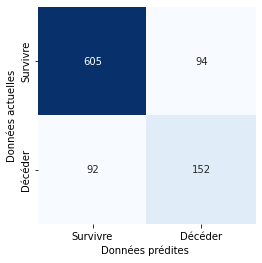

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = modele.predict(x_test) 
y_pred = (y_pred > 0.1)
cm = confusion_matrix(y_test, y_pred)
labels = ['Survivre', 'Décéder']
 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Données prédites ')
plt.ylabel('Données actuelles')

[]

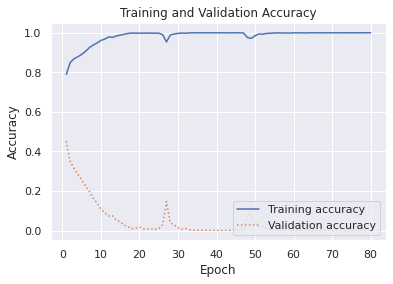

In [ ]:
    #visualisation
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    sns.set()
    acc =training.history['binary_accuracy']
    loss = training.history['loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, loss, ':', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.plot()

In [ ]:
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
from sklearn import datasets 
  
# Scaled data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test) # transform only!
lr = linear_model.LogisticRegression() 

skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=1) 

lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    lr.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold)) 
   
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

List of possible accuracy: [0.7754237288135594, 0.8771186440677966, 0.8516949152542372, 0.8686440677966102, 0.8389830508474576, 0.8516949152542372, 0.8347457627118644, 0.826271186440678, 0.8177966101694916, 0.826271186440678, 0.8347457627118644, 0.8808510638297873, 0.8340425531914893, 0.8127659574468085, 0.8382978723404255, 0.8340425531914893, 0.8340425531914893, 0.8127659574468085, 0.8553191489361702, 0.8382978723404255]

Maximum Accuracy That can be obtained from this model is: 88.08510638297872 %

Minimum Accuracy: 77.54237288135593 %

Overall Accuracy: 83.71907681211684 %

Standard Deviation is: 0.023962049840526224


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from numpy import absolute
from statistics import mean, stdev 

#define cross-validation 
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#build multiple linear regression model
model = LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))
#D'après la sortie, nous pouvons voir que l'erreur absolue moyenne (MAE) était  de 0.26609024532166065 . 
#Autrement dit, l'erreur absolue moyenne entre la prédiction du modèle et les données réelles observées est de 0.26609024532166065.
#on constate qu'elle est trés faible donc nous pouvons conclure que le modèle des donnés est capable de prédire les observations réelles.

 #L'exécution de l'exemple utilise l'ensemble de données, 
 #puis évalue un modèle de régression logistique sur celui-ci à l'aide d'une validation croisée 10 

0.26609024532166065

In [ ]:
modele.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               7900      
                                                                 
 dense_61 (Dense)            (None, 100)               10100     
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 dense_63 (Dense)            (None, 1)                 101       
                                                                 
Total params: 28,201
Trainable params: 28,201
Non-trainable params: 0
_________________________________________________________________
